In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


In [105]:
#for printing full numpy array
np.set_printoptions(threshold=np.inf)
#for printing till 3 decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})



In [106]:
df1=pd.read_csv("train.csv")

In [107]:
df_t1=pd.read_csv('test.csv')

In [108]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### dropping PassengerId

In [109]:
df2=df1.drop('PassengerId',axis=1)

In [110]:
df2_t=df_t1.drop('PassengerId',axis=1)

In [111]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


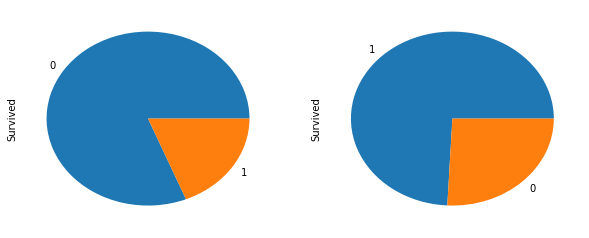

In [112]:
fig=plt.figure(figsize=(10,4))
fig.add_subplot(121)
df2.Survived[df2['Sex']=='male'].value_counts().plot(kind='pie')
fig.add_subplot(122)
df2.Survived[df2['Sex']=='female'].value_counts().plot(kind='pie')



In [113]:
from sklearn.preprocessing import LabelEncoder
df2['Sex']=LabelEncoder().fit_transform(df2['Sex'])
#since sex can be either 0 or 1, no need of oneHotEncoding or dummy variable trap

In [114]:
#for test data

from sklearn.preprocessing import LabelEncoder
df2_t['Sex']=LabelEncoder().fit_transform(df2_t['Sex'])
#since sex can be either 0 or 1, no need of oneHotEncoding or dummy variable trap

### getting titles from names

In [115]:
df2['Name']=df2['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())

titles=df2['Name'].unique()
print(titles)



#testData

df2_t['Name']=df2_t['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())

titles_t=df2_t['Name'].unique()
print(titles_t)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


# filling the age, titlewise

In [116]:
df2['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = df2.Age[(df2['Age'] != -1)&(df2['Name'] ==title)].median()
    medians[title]=median
    
for index, row in df2.iterrows():
    if row['Age'] == -1:
        df2.loc[index,'Age'] = medians[row['Name']]
        
        
#testData

df2_t['Age'].fillna(-1, inplace=True)

medians_t = dict()
for title in titles:
    median_t = df2_t.Age[(df2_t['Age'] != -1)&(df2_t['Name'] ==title)].median()
    medians_t[title]=median
    
for index, row in df2_t.iterrows():
    if row['Age'] == -1:
        df2.loc[index,'Age'] = medians_t[row['Name']]
        
     
        
        

In [117]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


In [118]:
df2_t.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,1,34.5,0,0,330911,7.8292,NaN,Q
1,3,Mrs,0,47.0,1,0,363272,7.0000,NaN,S
2,2,Mr,1,62.0,0,0,240276,9.6875,NaN,Q
3,3,Mr,1,27.0,0,0,315154,8.6625,NaN,S
4,3,Mrs,0,22.0,1,1,3101298,12.2875,NaN,S



### checking which titles are affecting the outcome

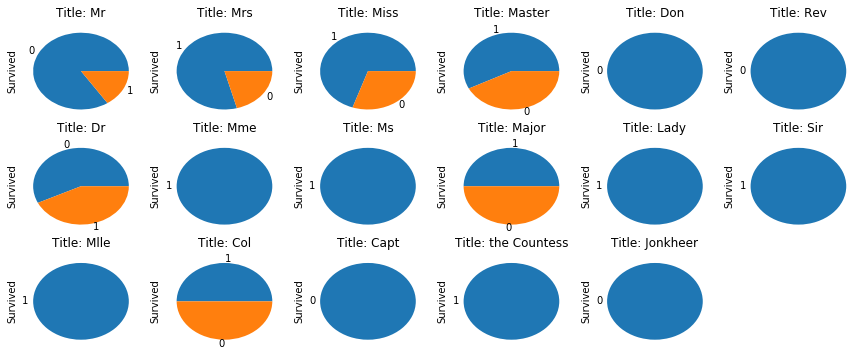

In [119]:
fig=plt.figure(figsize=(15,6))

i=1
for title in df2['Name'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Title: {}'.format(title))
    df2.Survived[df2['Name']==title].value_counts().plot(kind='pie')
    i+=1

### changing the values
#### 'Don', 'Rev','Capt','Jonkheer' with 0
#### 'Ms','Lady','Sir','Mlle','the Countess' with 7(the highest)
#### 'Col' and 'Major' are also the same

#### rest random values

In [120]:
SurvieReFramed={
    'Don':0,
    'Rev':0,
    'Capt':0,
    'Jonkheer':0,
    'Mr':1,
    'Dr':2,
    'Col':3,
    'Major':3,
    'Master':4,
    'Miss':5,
    'Mrs':6,
    'Mme':7,
    'Ms':7,
    'Mlle':7,
    'Sir':7,
    'Lady':7,
    'the Countess':7,
}

SurvieReFramed_t={
    'Mr':0,
    'Mrs':1,
    'Miss':2,
    'Master':3,
    'Ms':4,
    'Col':5,
    'Rev':6,
    'Dr':7,
    'Dona':8
}

### replacing name with the number to make name accountable, also using standard scalar

In [121]:
df2['Name']=df2['Name'].apply(lambda x:SurvieReFramed.get(x))


In [122]:
#testData

df2_t['Name']=df2_t['Name'].apply(lambda x:SurvieReFramed_t.get(x))


In [123]:
from sklearn.preprocessing import StandardScaler
df2['Name'] = StandardScaler().fit_transform(df2['Name'].values.reshape(-1,1))
df2['Age'] = StandardScaler().fit_transform(df2['Age'].values.reshape(-1,1))

/home/qwerty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [124]:
#testDataPrep
from sklearn.preprocessing import StandardScaler
df2_t['Name'] = StandardScaler().fit_transform(df2_t['Name'].values.reshape(-1,1))
df2_t['Age'] = StandardScaler().fit_transform(df2_t['Age'].values.reshape(-1,1))

/home/qwerty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### for fare, a similar apporach

In [125]:
df2['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in df2['Pclass'].unique():
    median = df2.Fare[(df2["Fare"] != -1) & (df2['Pclass'] == pclass)].median()
    medians[pclass] = median
for index, row in df2.iterrows():
    if row['Fare'] == -1:
        df2.loc[index, 'Fare'] = medians[row['Pclass']]
df2['Fare'] = StandardScaler().fit_transform(df2['Fare'].values.reshape(-1, 1))


#testDataPrep

df2_t['Fare'].fillna(-1, inplace=True)
medians_t = dict()
for pclass in df2_t['Pclass'].unique():
    median = df2_t.Fare[(df2_t["Fare"] != -1) & (df2_t['Pclass'] == pclass)].median()
    medians_t[pclass] = median
for index, row in df2_t.iterrows():
    if row['Fare'] == -1:
        df2_t.loc[index, 'Fare'] = medians_t[row['Pclass']]
df2_t['Fare'] = StandardScaler().fit_transform(df2_t['Fare'].values.reshape(-1, 1))


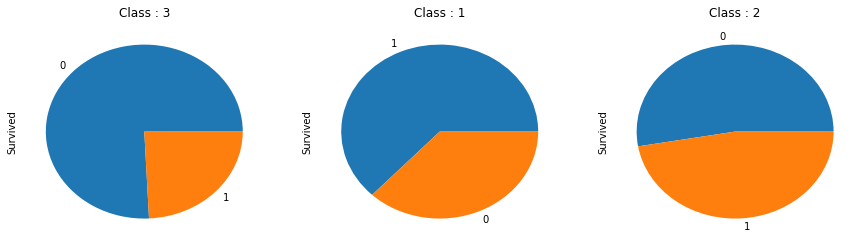

In [126]:
fig = plt.figure(figsize=(15,4))

i=1
for pclass in df2['Pclass'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Class : {}'.format(pclass))
    df2.Survived[df2['Pclass'] == pclass].value_counts().plot(kind='pie')
    i += 1

### no polar classes, so moving to scaling

In [127]:
df2['Pclass'] = StandardScaler().fit_transform(df2['Pclass'].values.reshape(-1, 1))

/home/qwerty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [128]:
#testDataPrep

df2_t['Pclass'] = StandardScaler().fit_transform(df2_t['Pclass'].values.reshape(-1, 1))

/home/qwerty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



### checking Parch



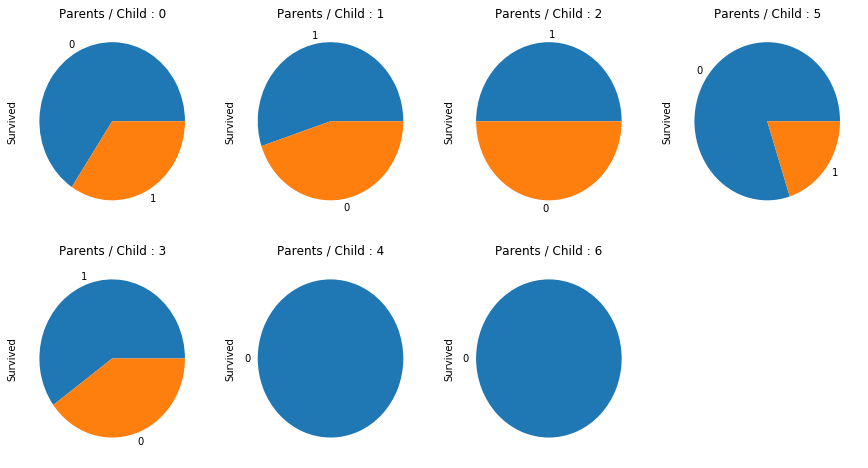

In [129]:
fig = plt.figure(figsize=(15,8))
i = 0
for parch in df2['Parch'].unique():
    fig.add_subplot(2, 4, i+1)
    plt.title('Parents / Child : {}'.format(parch))
    df2.Survived[df2['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1

In [130]:
parchReFramed = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}
df2['Parch'] = df2['Parch'].apply(lambda x: parchReFramed.get(x))
df2['Parch'] = StandardScaler().fit_transform(df2['Parch'].values.reshape(-1, 1))

/home/qwerty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [131]:
#the test set has more 

df2_t['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9])

In [132]:
#testDataPrep

parchReFramed_t = {
    0:1,
    1:1,
    3:2, 
    2:3,
    4:4,
    6:5, 
    5:6, 
    9:7
}
df2_t['Parch'] = df2_t['Parch'].apply(lambda x: parchReFramed_t.get(x))
df2_t['Parch'] = StandardScaler().fit_transform(df2_t['Parch'].values.reshape(-1, 1))

/home/qwerty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [133]:
# dropping ticket now, will visit later

df2.drop('Ticket', axis=1, inplace=True)


In [154]:
#testSetPrep

df2_t.drop('Ticket', axis=1, inplace=True)

In [ ]:
#most embarked is S

most_embarked=df2.Embarked.value_counts().index[0]

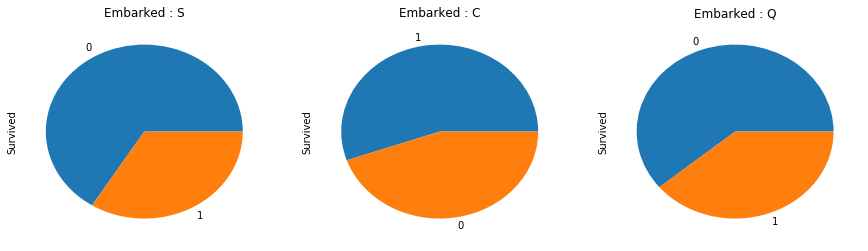

In [134]:
df2['Embarked'].fillna('S', inplace=True)
fig = plt.figure(figsize=(15,4))
i = 1
for embarked in df2['Embarked'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Embarked : {}'.format(embarked))
    df2.Survived[df2['Embarked'] == embarked].value_counts().plot(kind='pie')
    i += 1

### all non-polar

In [135]:
# easier replacement of oneHotEncoding

ParchEncoding = {
    'S': 0,
    'Q': 1,
    'C': 2
}

df2['Embarked'] = df2['Embarked'].apply(lambda x: ParchEncoding.get(x))
df2['Embarked'] = StandardScaler().fit_transform(df2['Embarked'].values.reshape(-1, 1))


/home/qwerty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [136]:
#testDataPrep

df2_t['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [137]:
#testDataPrep

#same data so ParchEncoding can be used, but still lets define one to avoid confusion

ParchEncoding_t = {
    'S': 0,
    'Q': 1,
    'C': 2
}

df2_t['Embarked'] = df2_t['Embarked'].apply(lambda x: ParchEncoding_t.get(x))
df2_t['Embarked'] = StandardScaler().fit_transform(df2_t['Embarked'].values.reshape(-1, 1))



/home/qwerty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


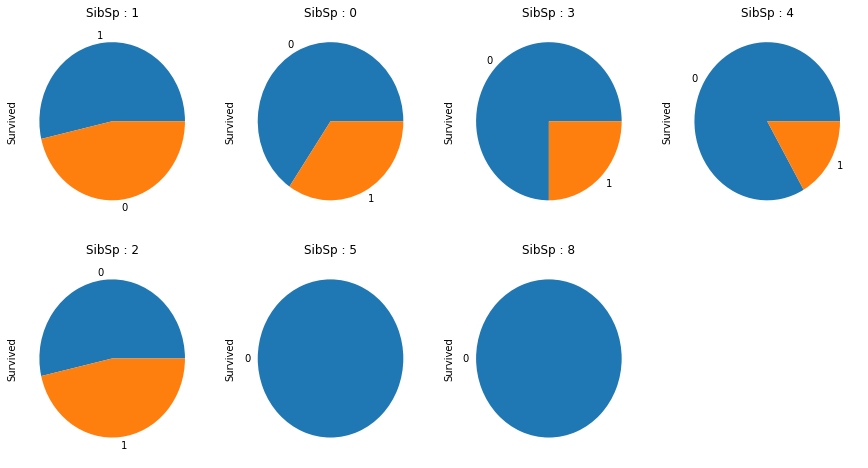

In [138]:
fig = plt.figure(figsize=(15,8))
i = 1
for sibsp in df2['SibSp'].unique():
    fig.add_subplot(2, 4, i)
    plt.title('SibSp : {}'.format(sibsp))
    df2.Survived[df2['SibSp'] == sibsp].value_counts().plot(kind='pie')
    i += 1

In [139]:
SibSpReFramed = {
    5: 0,
    8: 0,
    4: 1,
    3: 2,
    0: 3,
    2: 4,
    1: 5
}

df2['SibSp'] = df2['SibSp'].apply(lambda x: SibSpReFramed.get(x))
df2['SibSp'] = StandardScaler().fit_transform(df2['SibSp'].values.reshape(-1, 1))
df2.head()['SibSp']

/home/qwerty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0    1.576109
1    1.576109
2   -0.396241
3    1.576109
4   -0.396241
Name: SibSp, dtype: float64

In [140]:
#testDataPrep

df2_t['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [141]:
#testDataPrep


SibSpReFramed_t = {
    5: 1,
    8: 2,
    4: 3,
    3: 4,
    0: 5,
    2: 6,
    1: 7
}

df2_t['SibSp'] = df2_t['SibSp'].apply(lambda x: SibSpReFramed_t.get(x))
df2_t['SibSp'] = StandardScaler().fit_transform(df2_t['SibSp'].values.reshape(-1, 1))
df2_t.head()['SibSp']

/home/qwerty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0   -0.518153
1    1.525130
2   -0.518153
3   -0.518153
4    1.525130
Name: SibSp, dtype: float64

In [142]:
df2['Cabin'].fillna('U', inplace=True)
df2['Cabin'] = df2['Cabin'].apply(lambda x: x[0])
df2['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [143]:
#testDataPrep

df2_t['Cabin'].fillna('U', inplace=True)
df2_t['Cabin'] = df2_t['Cabin'].apply(lambda x: x[0])
df2_t['Cabin'].unique()

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

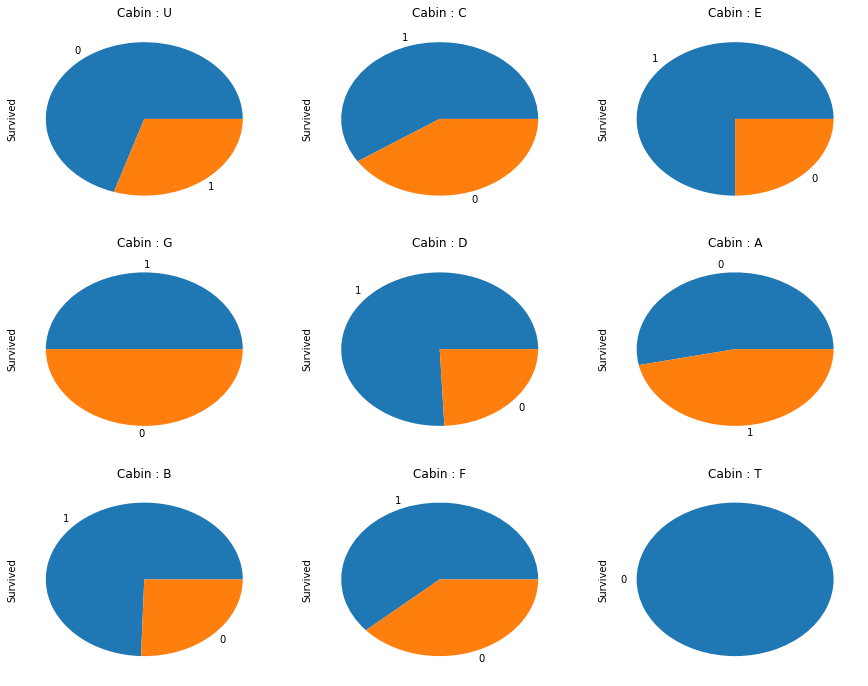

In [144]:
fig = plt.figure(figsize=(15,12))
i = 1
for cabin in df2['Cabin'].unique():
    fig.add_subplot(3, 3, i)
    plt.title('Cabin : {}'.format(cabin))
    df2.Survived[df2['Cabin'] == cabin].value_counts().plot(kind='pie')
    i += 1

In [145]:
CabinReFrame = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

df2['Cabin'] = df2['Cabin'].apply(lambda x: CabinReFrame.get(x))
df2['Cabin'] = StandardScaler().fit_transform(df2['Cabin'].values.reshape(-1, 1))
df2.head()['Cabin']

/home/qwerty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0   -0.494813
1    0.960231
2   -0.494813
3    0.960231
4   -0.494813
Name: Cabin, dtype: float64

In [146]:
CabinReFrame_t = {
    'U':1, 
    'B':2,
    'E':3,
    'A':4,
    'C':5,
    'D':6,
    'F':7,
    'G':8
}

df2_t['Cabin'] = df2_t['Cabin'].apply(lambda x: CabinReFrame_t.get(x))
df2_t['Cabin'] = StandardScaler().fit_transform(df2_t['Cabin'].values.reshape(-1, 1))
df2_t.head()['Cabin']

/home/qwerty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0   -0.467791
1   -0.467791
2   -0.467791
3   -0.467791
4   -0.467791
Name: Cabin, dtype: float64

In [147]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0.827377,-0.797294,1,-0.646302,1.576109,-0.468807,-0.502445,-0.494813,-0.585954
1,1,-1.566107,1.537975,0,0.608255,1.576109,-0.468807,0.786845,0.960231,1.942303
2,1,0.827377,1.070922,0,-0.332663,-0.396241,-0.468807,-0.488854,-0.494813,-0.585954
3,1,-1.566107,1.537975,0,0.373026,1.576109,-0.468807,0.420730,0.960231,-0.585954
4,0,0.827377,-0.797294,1,0.373026,-0.396241,-0.468807,-0.486337,-0.494813,-0.585954


# Training 

In [148]:
from sklearn.model_selection import train_test_split
survived = df2['Survived']
df2.drop('Survived', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df2, survived, test_size=0.2, random_state=42)


from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = [
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(model)
    print(score)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.8379888268156425
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
0.7988826815642458


/home/qwerty/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [149]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(model)
print(score)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.8268156424581006


In [155]:
df2_t.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.873482,-0.686021,1,0.596870,-0.518153,-0.300629,-0.497071,-0.467791,0.470915
1,0.873482,0.177704,0,1.296667,1.525130,-0.300629,-0.511934,-0.467791,-0.700767
2,-0.315819,-0.686021,1,2.136424,-0.518153,-0.300629,-0.463762,-0.467791,0.470915
3,0.873482,-0.686021,1,0.176992,-0.518153,-0.300629,-0.482135,-0.467791,-0.700767
4,0.873482,0.177704,0,-0.102927,1.525130,-0.300629,-0.417159,-0.467791,-0.700767


In [153]:
df2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.827377,-0.797294,1,-0.646302,1.576109,-0.468807,-0.502445,-0.494813,-0.585954
1,-1.566107,1.537975,0,0.608255,1.576109,-0.468807,0.786845,0.960231,1.942303
2,0.827377,1.070922,0,-0.332663,-0.396241,-0.468807,-0.488854,-0.494813,-0.585954
3,-1.566107,1.537975,0,0.373026,1.576109,-0.468807,0.420730,0.960231,-0.585954
4,0.827377,-0.797294,1,0.373026,-0.396241,-0.468807,-0.486337,-0.494813,-0.585954


In [156]:
df3_t=model.predict(df2_t)

In [157]:
df3_t.to_csv('final_test.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [160]:
np.savetxt('test_rf_clean1.csv',df3_t,fmt='%.0f',delimiter=',')